<a href="https://colab.research.google.com/github/nsubbaian/BayesianML/blob/master/Project1/BayesMLProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conjugate Priors

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import bernoulli
from scipy.special import gamma
import matplotlib.pyplot as plt

Simulation 1 - Bernoulli random variables

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in power
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


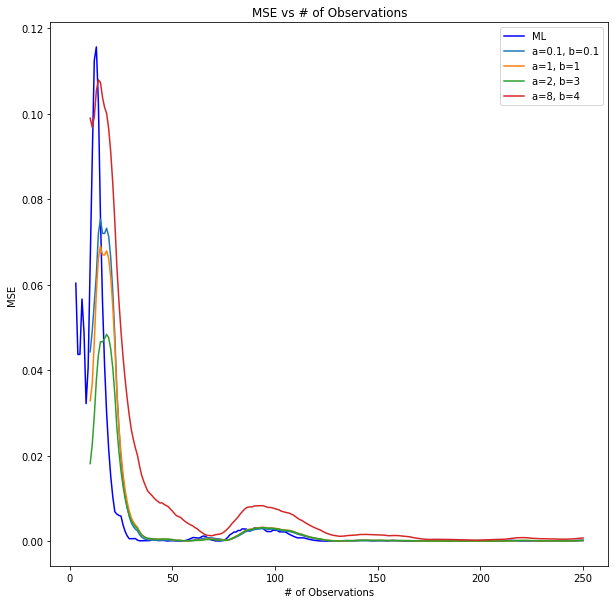

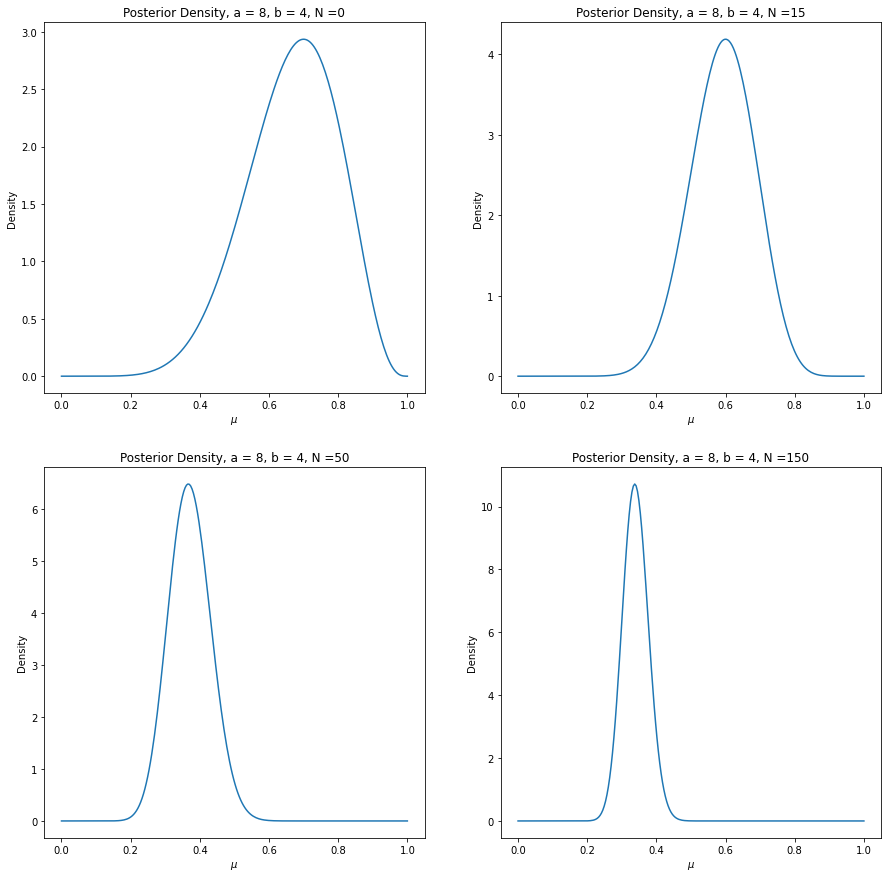

In [2]:
mean = 0.3

#-------------------  Estimation of probability p using ML estimate (Eq 2.7) -------------------
observations = 250
ML_estimate = [] 
ML_MSE = []

b = bernoulli.rvs(mean, size= observations)

for n in range(1, observations + 1):
    ML_est = sum(b[0:n])/len(b[0:n])
    ML_estimate.append(ML_est)
    ML_MSE.append(np.mean((ML_est - mean)**2 ))

#------------------- Estimation of probability p using Conjugate priors with a "good" initial guess -------------------

prior_a = [.1, 1, 2, 8]
prior_b = [.1, 1, 3, 4]
all_mu = np.linspace(0,1,num = n)
accumulation = []

def posterior(mu,a,b,m,l):
    return (gamma(m+a+l+b)/(gamma(m+a)*gamma(l+b)))*(mu**(m+a-1))*((1-mu)**(l+b-1)) 

def conjPrior(a,b,m,l):
    return (m+a)/(m+a+b+l)

def mse(obs, pred):
    return np.mean((obs-pred)**2)

for i in range(0,4):
  for n in range(1, observations):
      if n == 1:
        #initial conditions
        m = 0 
        l = 0   
        conjPrior_MSE = []
        conjPrior_MSE.append(mse(conjPrior(prior_a[i], prior_b[i], m, l), mean)) 
        posteriorDensity = []  
        posteriorDensity.append(posterior(all_mu, prior_a[i], prior_b[i], m, l))
    
      m = sum(b[0:n])
      l = n - m

      conjPrior_result = conjPrior(prior_a[i],prior_b[i], m, l)
      conjPrior_MSE.append(mse(conjPrior_result, mean))
      posteriorDensity.append(posterior(all_mu, prior_a[i], prior_b[i], m , l))

  accumulation.append(conjPrior_MSE)

#-------------------  Plotting ML and conjugate prior estimates  -------------------

fig = plt.figure(figsize=[10,10])
obs = np.arange(1, observations+1)
plt.plot(obs,  pd.Series(ML_MSE).rolling(3).mean(), 'b', label='ML')
for i in range(0,4):
  plt.plot(obs,  pd.Series(accumulation[i]).rolling(10).mean(), label='a={}, b={}'.format(prior_a[i], prior_b[i]))

plt.xlabel('# of Observations')
plt.ylabel('MSE')
plt.title('MSE vs # of Observations')
plt.legend()
plt.show()

fig2, axs = plt.subplots(2,2, figsize = (15,15))
axs = axs.ravel()
for i in range(0,4):
  index = [0,15,50,150][i]
  axs[i].plot(all_mu, posteriorDensity[index])
  axs[i].set_title('Posterior Density, a = {}, b = {}, N ={}'.format(prior_a[3], prior_b[3], index))
  axs[i].set_xlabel('$\mu$')
  axs[i].set_ylabel('Density')

Simulation 2 - Gaussian

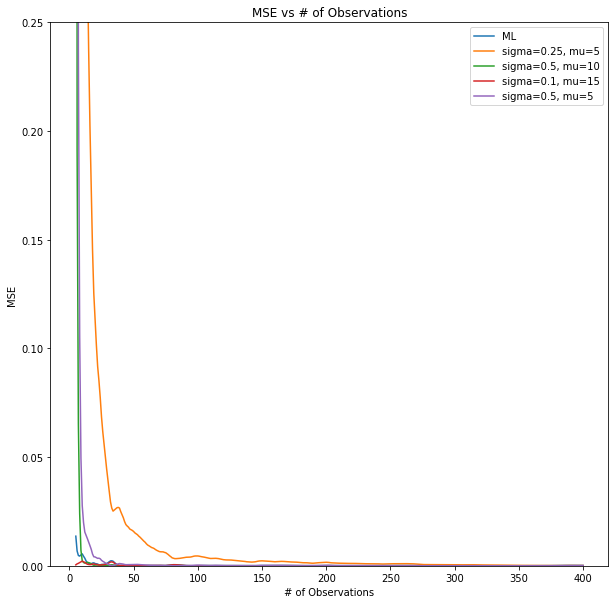

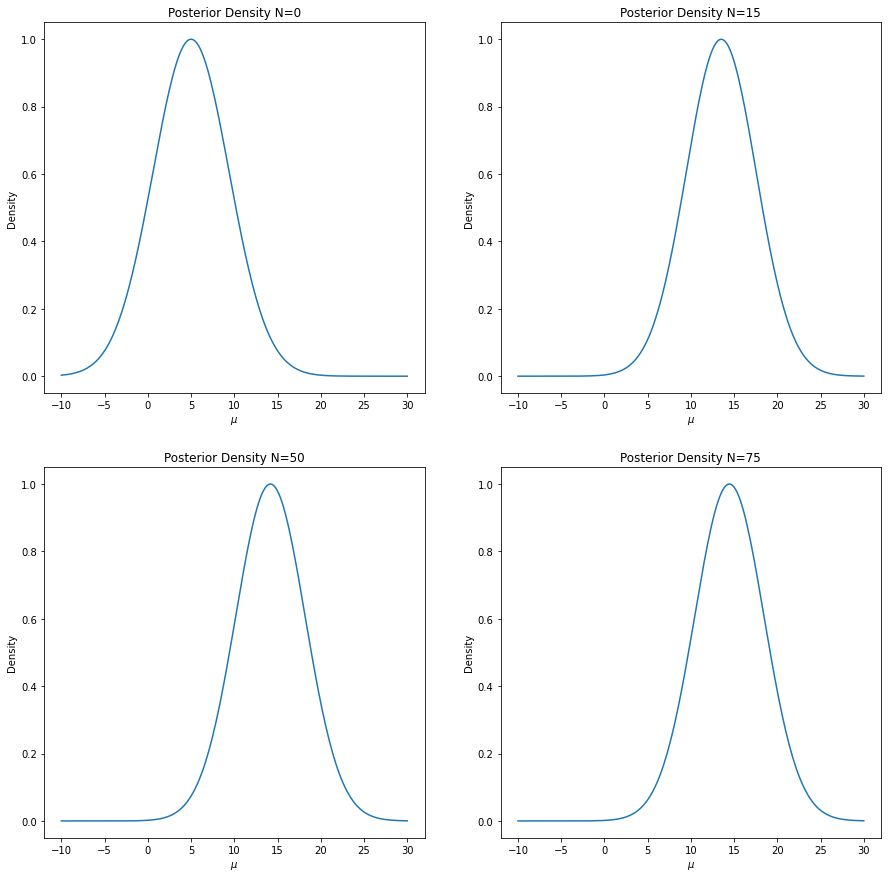

In [8]:
# The second simulation, you should do the same thing, except for the Gaussian
# with unknown mean, known variance case. The ML estimate is eqn 2.143, and the
# conj prior update equations are 2.141 and 2.142. Plot the same things are you
# did for the Bernoulli.

dist_mean = 15
dist_sigma = .2

#-------------------  Estimation of probability p using ML estimate (Eq 2.7) -------------------
observations = 400
ML_estimate = [] 
ML_MSE = []

g = np.random.normal(dist_mean, dist_sigma , observations)

for n in range(1, observations + 1):
    ML_est = sum(g[0:n])/len(g[0:n])
    ML_estimate.append(ML_est)
    ML_MSE.append(np.mean((ML_est - dist_mean)**2 ))

#------------------- Estimation of probability p using Gaussian with unknown mean, known variance case -------------------

sigma_O_val =[.25, .5, .1, .5]
mu_O_val = [5, 10, 15, 5]
all_var = np.linspace(0,1,num = n)
Gmeans = []
Gmeans_MSE =[]
Gvars = []


def gaussMean(sigma, N_val, sigma_O, mu_O, mu_ML):
    return (sigma**2/(N_val*sigma_O**2 + sigma**2)*mu_O + N_val*sigma_O**2/(N_val*sigma_O**2 + sigma**2)*mu_ML) 

def gaussVar(sigma_O, N_val, sigma):
    return ((1/sigma_O**2) + (N_val/sigma**2)**(-1))

def mse(obs, pred):
    return np.mean((obs-pred)**2)

for i in range(0,4):
  for n in range(1, observations):
      if n == 1:
        #initial conditions
        initialMean = gaussMean(dist_sigma, 0, sigma_O_val[i], mu_O_val[i], ML_estimate[n])
        gaussMean_vals = []
        gaussMean_vals.append(initialMean)
        gaussMean_MSE = []
        gaussMean_MSE.append(mse(dist_mean, initialMean)) 

        gaussVar_arr = []  
        gaussVar_arr.append(gaussVar(sigma_O_val[i], 0.1, dist_sigma))
    
      gaussMean_val = gaussMean(dist_sigma, n, sigma_O_val[i], mu_O_val[i], ML_estimate[n])
      gaussMean_vals.append(gaussMean_val)                        
      gaussMean_MSE.append(mse(gaussMean_val, dist_mean))
      gaussVar_arr.append(gaussVar(sigma_O_val[i], n, dist_sigma))

  Gmeans.append(gaussMean_vals)
  Gmeans_MSE.append(gaussMean_MSE)
  Gvars.append(gaussVar_arr)

#-------------------  Plotting  -------------------

fig = plt.figure(figsize=[10,10])
obs = np.arange(1, observations+1)
plt.plot(obs, pd.Series(ML_MSE).rolling(5).mean(), label='ML')

for i in range(0,4):
  plt.plot(obs, pd.Series(Gmeans_MSE[i]).rolling(5).mean(), label='sigma={}, mu={}'.format(sigma_O_val[i], mu_O_val[i]))

plt.xlabel('# of Observations')
plt.ylabel('MSE')
plt.title('MSE vs # of Observations')
plt.legend()
plt.ylim((0, .25))  
plt.show()

def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

x_values = np.linspace(-10, 30, 200)
fig2, axs = plt.subplots(2,2, figsize = (15,15))
axs = axs.ravel()
for i in range(0,4):
  index = [0,15,50,75][i]
  axs[i].plot(x_values, gaussian(x_values, Gmeans[3][i], Gvars[3][i]))
  axs[i].set_title('Posterior Density N={}'.format(index))
  axs[i].set_xlabel('$\mu$')
  axs[i].set_ylabel('Density')